✅ Successfully loaded 100 epochs from training_log.csv


,Epoch,Train_Loss,Train_PSNR,Val_Accuracy,Val_AUC,Time(s),Latency(ms),VRAM(MB),FLOPS(G)
95,96,9423.4925,23.14,0.788,0.9393,60.13,4.00,1186.79,6.84
96,97,9271.6930,23.22,0.792,0.9400,60.60,8.00,1186.79,6.84
97,98,9277.3434,23.23,0.800,0.9404,60.28,4.00,1186.79,6.84
98,99,9304.0089,23.21,0.796,0.9399,60.00,4.01,1186.79,6.84
99,100,9255.4949,23.23,0.793,0.9398,59.93,4.01,1186.79,6.84


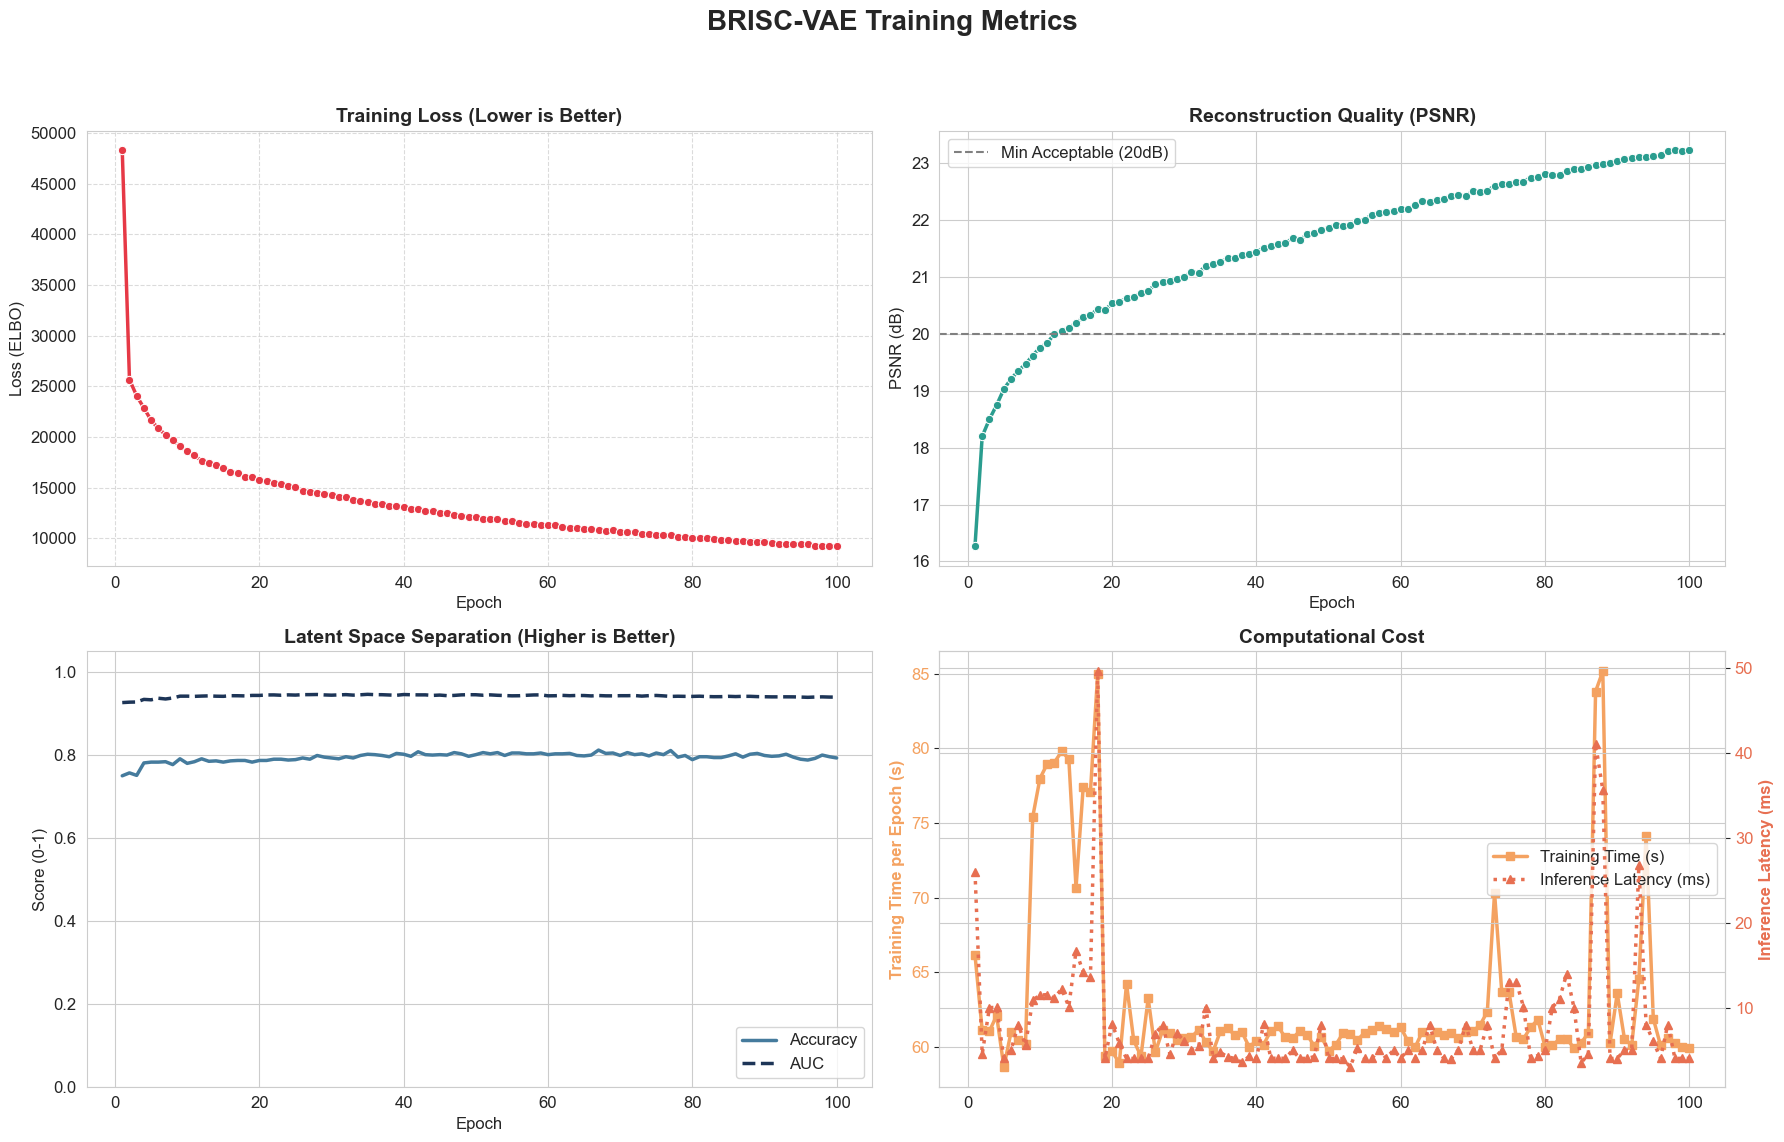


📊 **Training Summary**
🏆 Best Epoch: 67
   • Accuracy: 0.8120
   • AUC:      0.9436
   • PSNR:     22.43 dB
💻 Hardware Stats (Avg):
   • VRAM Used: 1185.68 MB
   • Latency:   7.79 ms


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
# Ensure 'training_log.csv' is in the same folder as this notebook
csv_file = "training_log.csv"

try:
    df = pd.read_csv(csv_file)
    print(f"✅ Successfully loaded {len(df)} epochs from {csv_file}")
    display(df.tail()) # Show last 5 rows
except FileNotFoundError:
    print(f"❌ Error: Could not find '{csv_file}'. Make sure the file exists.")
    # Create dummy data for demonstration if file is missing
    print("⚠️ Generating dummy data for demonstration...")
    data = {
        'Epoch': range(1, 21),
        'Train_Loss': [10000/(x**0.5) for x in range(1, 21)],
        'Train_PSNR': [15 + x*0.5 for x in range(1, 21)],
        'Val_Accuracy': [0.6 + x*0.01 for x in range(1, 21)],
        'Val_AUC': [0.8 + x*0.005 for x in range(1, 21)],
        'Time(s)': [60] * 20,
        'Latency(ms)': [8] * 20,
        'VRAM(MB)': [1200] * 20,
        'FLOPS(G)': [6.84] * 20
    }
    df = pd.DataFrame(data)

# --- 2. Setup Plot Style ---
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# --- 3. Generate Plots ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('BRISC-VAE Training Metrics', fontsize=20, weight='bold')

# Plot A: Training Loss (The "Learning" Curve)
sns.lineplot(ax=axes[0, 0], x='Epoch', y='Train_Loss', data=df, color='#E63946', linewidth=2.5, marker='o')
axes[0, 0].set_title('Training Loss (Lower is Better)', fontsize=14, weight='bold')
axes[0, 0].set_ylabel('Loss (ELBO)')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Plot B: Reconstruction Quality (PSNR)
sns.lineplot(ax=axes[0, 1], x='Epoch', y='Train_PSNR', data=df, color='#2A9D8F', linewidth=2.5, marker='o')
axes[0, 1].set_title('Reconstruction Quality (PSNR)', fontsize=14, weight='bold')
axes[0, 1].set_ylabel('PSNR (dB)')
axes[0, 1].axhline(y=20, color='gray', linestyle='--', label='Min Acceptable (20dB)')
axes[0, 1].legend()

# Plot C: Unsupervised Classification (Acc & AUC)
sns.lineplot(ax=axes[1, 0], x='Epoch', y='Val_Accuracy', data=df, label='Accuracy', color='#457B9D', linewidth=2.5)
sns.lineplot(ax=axes[1, 0], x='Epoch', y='Val_AUC', data=df, label='AUC', color='#1D3557', linestyle='--', linewidth=2.5)
axes[1, 0].set_title('Latent Space Separation (Higher is Better)', fontsize=14, weight='bold')
axes[1, 0].set_ylabel('Score (0-1)')
axes[1, 0].set_ylim(0, 1.05)
axes[1, 0].legend(loc='lower right')

# Plot D: System Performance (Time & Latency)
ax4 = axes[1, 1]
line1 = ax4.plot(df['Epoch'], df['Time(s)'], color='#F4A261', label='Training Time (s)', linewidth=2.5, marker='s')
ax4.set_ylabel('Training Time per Epoch (s)', color='#F4A261', weight='bold')
ax4.tick_params(axis='y', labelcolor='#F4A261')
ax4.set_title('Computational Cost', fontsize=14, weight='bold')

# Create a twin axis for Latency
ax4_twin = ax4.twinx()
line2 = ax4_twin.plot(df['Epoch'], df['Latency(ms)'], color='#E76F51', label='Inference Latency (ms)', linewidth=2.5, linestyle=':', marker='^')
ax4_twin.set_ylabel('Inference Latency (ms)', color='#E76F51', weight='bold')
ax4_twin.tick_params(axis='y', labelcolor='#E76F51')

# Combine legends for dual axis
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax4.legend(lines, labels, loc='center right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

# --- 4. Print Summary Stats ---
print("\n📊 **Training Summary**")
best_epoch = df.loc[df['Val_Accuracy'].idxmax()]
print(f"🏆 Best Epoch: {int(best_epoch['Epoch'])}")
print(f"   • Accuracy: {best_epoch['Val_Accuracy']:.4f}")
print(f"   • AUC:      {best_epoch['Val_AUC']:.4f}")
print(f"   • PSNR:     {best_epoch['Train_PSNR']:.2f} dB")
print(f"💻 Hardware Stats (Avg):")
print(f"   • VRAM Used: {df['VRAM(MB)'].mean():.2f} MB")
print(f"   • Latency:   {df['Latency(ms)'].mean():.2f} ms")

Loading data from ../Dataset/brisc2025...
✅ Data Loaded.
Initializing model on cuda...
Loading weights from VAE/best_brisc_vae.pth...
✅ Model Loaded Successfully!

🔍 Generating Reconstructions...


C:\Users\sanke\AppData\Local\Temp\ipykernel_23348\2250098899.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("best_psnr_brisc_vae.pth", map_loca

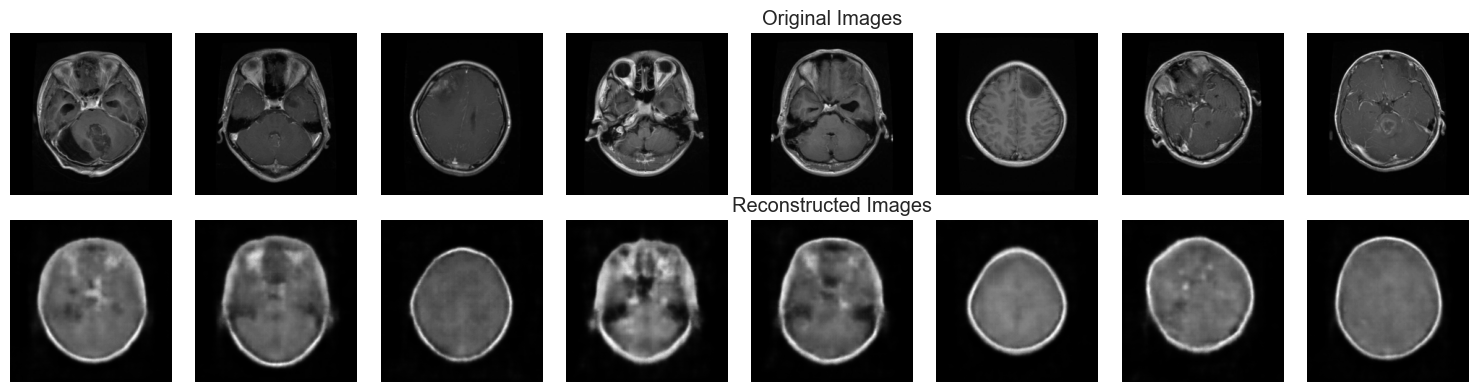

Extracting features from Test Set...


100%|██████████| 32/32 [00:25<00:00,  1.25it/s]


Running t-SNE (this might take a moment)...


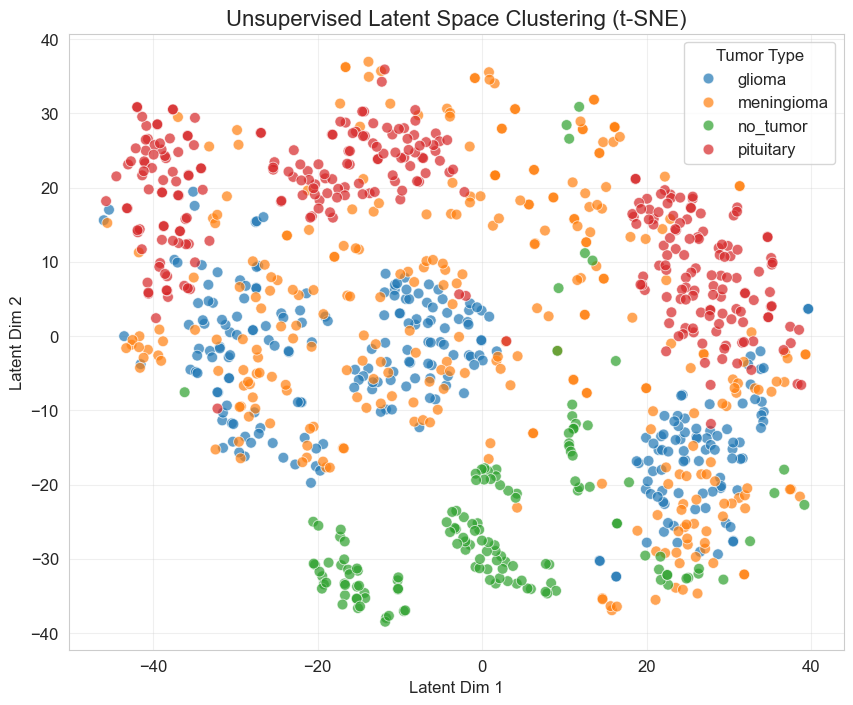

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from tqdm import tqdm

# Import your modules
from src.model import ResNetVAE
from src.dataset import get_dataloaders
from src.utils import calculate_psnr

# --- Configuration ---
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATASET_PATH = "../Dataset/brisc2025"  # Check your path
MODEL_PATH = "VAE/best_brisc_vae.pth" # Or 'best_acc_brisc_vae.pth'
LATENT_DIM = 128

# 1. LOAD DATA (This was missing!)
print(f"Loading data from {DATASET_PATH}...")
train_loader, test_loader = get_dataloaders(DATASET_PATH, batch_size=32)
print("✅ Data Loaded.")

# 1. Load Data & Model
print(f"Initializing model on {DEVICE}...")
model = ResNetVAE(latent_dim=LATENT_DIM).to(DEVICE)

# 2. Load and Clean Weights
print(f"Loading weights from {MODEL_PATH}...")
checkpoint = torch.load("best_psnr_brisc_vae.pth", map_location=DEVICE) # Make sure filename matches

# Determine if it's a full checkpoint or just weights
if 'model_state_dict' in checkpoint:
    state_dict = checkpoint['model_state_dict']
else:
    state_dict = checkpoint

# --- CLEANING STEP (The Fix) ---
# Create a new dictionary without 'total_ops' or 'total_params'
clean_state_dict = {k: v for k, v in state_dict.items() if "total_ops" not in k and "total_params" not in k}

# Load the clean dictionary
model.load_state_dict(clean_state_dict, strict=False) 
# strict=False is an extra safety net, but the cleaning above is the real fix

model.eval()
print("✅ Model Loaded Successfully!")

# --- VISUALIZATION 1: Original vs Reconstruction ---
def show_reconstructions(model, loader, n=8):
    data, _ = next(iter(loader))
    data = data.to(DEVICE)
    
    with torch.no_grad():
        recon, _, _ = model(data)
        
    data = data.cpu().numpy()
    recon = recon.cpu().numpy()
    
    fig, axes = plt.subplots(2, n, figsize=(15, 4))
    for i in range(n):
        # Original
        axes[0, i].imshow(data[i][0], cmap='gray')
        axes[0, i].axis('off')
        if i == n//2: axes[0, i].set_title("Original Images")
        
        # Reconstructed
        axes[1, i].imshow(recon[i][0], cmap='gray')
        axes[1, i].axis('off')
        if i == n//2: axes[1, i].set_title("Reconstructed Images")
        
    plt.tight_layout()
    plt.show()

print("\n🔍 Generating Reconstructions...")
show_reconstructions(model, test_loader)

# --- VISUALIZATION 2: Latent Space Cluster (The "Magic" Part) ---
def plot_latent_space(model, loader):
    latents = []
    labels = []
    
    print("Extracting features from Test Set...")
    with torch.no_grad():
        for data, y in tqdm(loader):
            data = data.to(DEVICE)
            mu, _ = model.encoder_backbone(data), None 
            # Manually run encoder parts to get 'mu'
            features = model.encoder_backbone(data)
            features = features.view(features.size(0), -1)
            mu = model.fc_mu(features)
            
            latents.append(mu.cpu().numpy())
            labels.append(y.numpy())
            
    latents = np.concatenate(latents)
    labels = np.concatenate(labels)
    
    # Dimensionality Reduction (128D -> 2D)
    print("Running t-SNE (this might take a moment)...")
    tsne = TSNE(n_components=2, random_state=42)
    z_embedded = tsne.fit_transform(latents)
    
    # Plot
    plt.figure(figsize=(10, 8))
    # Map class indices to names (Adjust based on your folder names if needed)
    class_names = loader.dataset.classes 
    label_names = [class_names[i] for i in labels]
    
    sns.scatterplot(x=z_embedded[:,0], y=z_embedded[:,1], hue=label_names, palette='tab10', s=60, alpha=0.7)
    plt.title("Unsupervised Latent Space Clustering (t-SNE)", fontsize=16)
    plt.xlabel("Latent Dim 1")
    plt.ylabel("Latent Dim 2")
    plt.legend(title="Tumor Type")
    plt.grid(True, alpha=0.3)
    plt.show()

plot_latent_space(model, test_loader)

In [ ]:
def detect_anomalies(model, loader, threshold=0.1):
    data, _ = next(iter(loader))
    data = data.to(DEVICE)
    
    with torch.no_grad():
        recon, _, _ = model(data)
    
    # Calculate absolute difference (The "Anomaly Map")
    diff = torch.abs(data - recon)
    
    data = data.cpu().numpy()
    recon = recon.cpu().numpy()
    diff = diff.cpu().numpy()
    
    n = 8
    plt.figure(figsize=(20, 8))
    for i in range(n):
        # 1. Original
        plt.subplot(3, n, i + 1)
        plt.imshow(data[i][0], cmap='gray')
        plt.title("Original")
        plt.axis('off')
        
        # 2. Reconstructed (Notice: Tumor is often blurry/gone)
        plt.subplot(3, n, i + 1 + n)
        plt.imshow(recon[i][0], cmap='gray')
        plt.title("Reconstruction")
        plt.axis('off')
        
        # 3. Anomaly Map (Difference)
        plt.subplot(3, n, i + 1 + 2*n)
        # We use 'hot' colormap to make anomalies look like "heat"
        plt.imshow(diff[i][0], cmap='hot', vmin=0, vmax=1) 
        plt.title("Anomaly Detection\n(Difference)")
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

print("🔍 Running Anomaly Detection Visualization...")
detect_anomalies(model, test_loader)